In [32]:
import math
import sys

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, s3_load_trial_quick
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import TOPICS_STATIC, TOPICS_DYNAMIC, LATENT_STATIC, LATENT_DYNAMIC, get_len_trial
from reclab.recommenders import TopPop


In [91]:
# S3 storage parameters
bucket_name = 'recsys-eval'
bucket = boto3.resource('s3').Bucket(bucket_name)
data_dir = 'master'
overwrite = False

env_name = 'latent_dynamic' #'topics_static'

if env_name == 'topics_static':
    ENV_PARAMS = TOPICS_STATIC
    EnvObj = Topics
elif env_name == 'topics_dynamic':
    ENV_PARAMS = TOPICS_DYNAMIC
    EnvObj = Topics
elif env_name == 'latent_static':
    ENV_PARAMS = LATENT_STATIC
    EnvObj = LatentFactorBehavior
elif env_name == 'latent_dynamic':
    ENV_PARAMS = LATENT_DYNAMIC
    EnvObj = LatentFactorBehavior
else:
    assert False, "environment not implemented!"


# Experiment setup.
n_trials = 4
trial_seeds = [i for i in range(n_trials)]
num_init_ratings = ENV_PARAMS['optional_params']['num_init_ratings']

environment_name = ENV_PARAMS['name']
env_name = ENV_PARAMS['name']

# Recommender setup
recommender_names = ['PerfectRec', 'TopPop']

In [92]:
all_ratings = []
all_predictions = []
for rec_name in recommender_names:
    all_ratings.append([])
    all_predictions.append([])
    print('Loading trials for recommender:', rec_name)
    for seed in trial_seeds:

        print('Loading trial with seed:', seed)
        dir_name = s3_experiment_dir_name(data_dir, env_name, rec_name, seed)
        ratings, predictions = s3_load_trial_quick(bucket, dir_name)
        all_ratings[-1].append(ratings)
        all_predictions[-1].append(predictions)


Loading trials for recommender: PerfectRec
Loading trial with seed: 0
Loading trial with seed: 1
Loading trial with seed: 2
Loading trial with seed: 3
Loading trials for recommender: TopPop
Loading trial with seed: 0
Loading trial with seed: 1
Loading trial with seed: 2
Loading trial with seed: 3


In [93]:
all_ratings = np.array(all_ratings)
all_predictions = np.array(all_predictions)

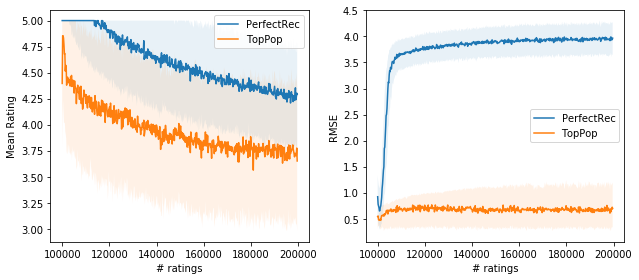

In [94]:
plot_ratings_mses(all_ratings,
                      all_predictions,
                      recommender_names,
                      summary_type='median',
                      num_init_ratings=num_init_ratings, threshold=10)

In [95]:
all_ratings[0]

array([[[5.        , 5.        , 5.        , ..., 5.        ,
         4.95098412, 5.        ],
        [5.        , 5.        , 5.        , ..., 5.        ,
         5.        , 5.        ],
        [4.72599469, 5.        , 5.        , ..., 3.66738149,
         5.        , 5.        ],
        ...,
        [3.2515997 , 3.72418512, 4.56595114, ..., 4.60057851,
         4.47589288, 5.        ],
        [4.19053027, 3.2812296 , 4.6782349 , ..., 2.10992505,
         4.23267143, 5.        ],
        [3.72316075, 4.78079411, 4.25201773, ..., 4.96840831,
         4.33290956, 4.91904173]],

       [[5.        , 5.        , 5.        , ..., 4.55804114,
         5.        , 5.        ],
        [5.        , 5.        , 5.        , ..., 5.        ,
         5.        , 4.53892362],
        [5.        , 5.        , 5.        , ..., 5.        ,
         5.        , 5.        ],
        ...,
        [4.53615905, 4.16528072, 3.57256294, ..., 3.68745687,
         4.40609692, 3.80944671],
        [4.8

In [96]:
all_predictions[0]

array([[[ 6.07741791e+00,  6.22935709e+00,  5.66225601e+00, ...,
          6.12929717e+00,  5.17144544e+00,  5.99799325e+00],
        [ 5.42705214e+00,  5.54339321e+00,  5.97580922e+00, ...,
          5.51400733e+00,  6.23740499e+00,  5.59178095e+00],
        [ 4.82639525e+00,  5.50665504e+00,  6.64597061e+00, ...,
          4.56623675e+00,  5.04280198e+00,  5.05405231e+00],
        ...,
        [-4.38880025e-01,  1.39708682e-01,  3.69930561e-01, ...,
         -6.24866299e-02,  1.17701548e-01,  1.11307403e+00],
        [ 8.69646727e-01, -8.87477304e-01,  5.46157325e-01, ...,
         -8.49253488e-01,  1.90163562e-01,  1.06444600e+00],
        [ 1.40555414e-01, -2.62641675e-01,  8.43547047e-01, ...,
          1.96940019e-01,  4.13691500e-01,  1.36812241e+00]],

       [[ 4.86087262e+00,  6.22633615e+00,  6.77273495e+00, ...,
          5.61512310e+00,  6.65974008e+00,  5.12116211e+00],
        [ 5.65557586e+00,  5.84688822e+00,  6.36376522e+00, ...,
          5.67523220e+00,  6.60597041e